In [1]:
import igraph
g = igraph.Graph.Read_GML('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\football.gml')
igraph.plot(g)
print(g.community_label_propagation())

ModuleNotFoundError: No module named 'igraph'

# -----------------

In [2]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# 数据加载
G=nx.read_gml('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\football.gml')
# 可视化
nx.draw(G,with_labels=True) 
plt.show()
# 社区发现
communities = list(community.label_propagation_communities(G))
print(communities)
print(len(communities))

C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

[{'Akron', 'Marshall', 'Buffalo', 'MiamiOhio', 'BowlingGreenState', 'Ohio', 'Kent', 'Connecticut'}, {'Navy', 'MiamiFlorida', 'Pittsburgh', 'Rutgers', 'WestVirginia', 'Syracuse', 'BostonCollege', 'VirginiaTech', 'Temple', 'NotreDame'}, {'NevadaLasVegas', 'ColoradoState', 'AirForce', 'BrighamYoung', 'SanDiegoState', 'Wyoming', 'NewMexico', 'Utah'}, {'MichiganState', 'OhioState', 'Michigan', 'Purdue', 'Wisconsin', 'Illinois', 'Indiana', 'PennState', 'Iowa', 'Minnesota', 'Northwestern'}, {'KansasState', 'Missouri', 'Colorado', 'Baylor', 'IowaState', 'TexasA&M', 'Kansas', 'Oklahoma', 'OklahomaState', 'Nebraska', 'Texas', 'TexasTech'}, {'Duke', 'GeorgiaTech', 'NorthCarolina', 'FloridaState', 'Maryland', 'Clemson', 'NorthCarolinaState', 'WakeForest', 'Virginia'}, {'ArizonaState', 'BoiseState', 'Oregon', 'WashingtonState', 'Stanford', 'Arizona', 'ArkansasState', 'SouthernCalifornia', 'UCLA', 'Idaho', 'Washington', 'UtahState', 'California', 'OregonState', 'NorthTexas', 'NewMexicoState'}, {'Mem

# -----------------

defaultdict(<class 'list'>, {('Jake Sullivan', 'Hillary Clinton'): 815, ('nan', 'Hillary Clinton'): 20, ('Cheryl Mills', ';h'): 1, ('Cheryl Mills', 'Hillary Clinton'): 1182, ('Hillary Clinton', 'Huma Abedin'): 32, ('Hillary Clinton', 'russorv'): 26, ('slaughter anne-marie', 'Hillary Clinton'): 126, ('Harold Hongju Koh', 'Hillary Clinton'): 12, ('Wendy Sherman', 'Hillary Clinton'): 7, ('Jake Sullivan', 'Wendy Sherman'): 1, ('Hillary Clinton', 'sullivanjj'): 288, ('Sidney Blumenthal', 'Hillary Clinton'): 361, ('Burns Strider', 'Hillary Clinton'): 2, ('Huma Abedin', 'Hillary Clinton'): 1322, ('Cheryl Mills', 'Cheryl Mills'): 17, ('Robert Russo', 'Hillary Clinton'): 22, ('Capricia Marshall', 'Cheryl Mills'): 2, ('Hillary Clinton', 'Oscar Flores'): 5, ('William Burns', 'Hillary Clinton'): 10, ('Monica Hanley', 'Hillary Clinton'): 24, ('Hillary Clinton', 'abedinh'): 345, ('Hillary Clinton', 'millscd'): 298, ('Daniel Schwerin', 'Hillary Clinton'): 9, ('Hillary Clinton', 'hanleymr'): 33, ('Mon

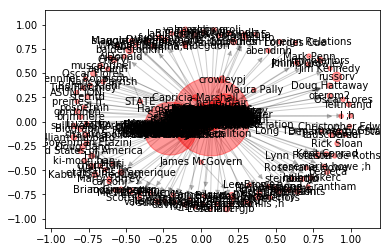

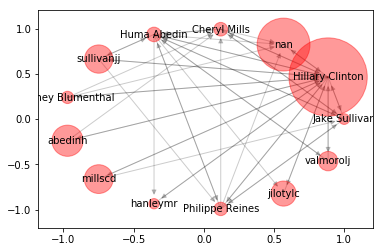

In [3]:
# -*- coding: utf-8 -*-
# 用PageRank挖掘希拉里邮件中的重要任务关系
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# 数据加载
emails = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Emails.csv')
# 读取别名文件
file = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Aliases.csv')
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
# 读取人名文件
file = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Persons.csv')
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

# 针对别名进行转换        
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉, 和@后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name
# 画网络图
def show_graph(graph, type = 'spring_layout'):
    if type == 'spring_layout':
        # 使用Spring Layout布局，类似中心放射状
        positions=nx.spring_layout(graph)
    if type == 'circular_layout':
        # 使用Circular Layout布局，在一个圆环上均匀分布
        positions=nx.circular_layout(graph)

    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()

# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

# 设置遍的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

print(edges_weights_temp)
print('-'*100)
# 转化格式 (from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点（人）的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)
# 画网络图
show_graph(graph)

# 将完整的图谱进行精简
# 设置PR值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')

In [15]:
# -*- coding: utf-8 -*-
# 用PageRank挖掘希拉里邮件中的重要任务关系
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# 数据加载
emails = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Emails.csv')
# 读取别名文件
file = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Aliases.csv')
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']

In [24]:
for index, row in file.iterrows():
    print(row['Alias'])

111th congress
agna usemb kabul afghanistan
ap
asuncion
alec
dupuy alex
american beverage association
mayock andrew
shapiro andrew j
shapiroa@state.gov
slaughter annmarie
slaughter anne marie
slaughter annemarie
slaughtera@state.gov
lake anthony
valenzuela arturo a
valenzuelaaa@state.gov
kimoon ban
obama barack
president
bam@mikulski.senate.gov
mikulski bam
mikulski bam (mikulski)
mikulski bam (mitkulski)
mikulskibam (mikulski)
betsy.ebeling
ebeling betsy
betsyebeling
betsyebeling1050
clinton william j
dad
biography
klehr bonnie
brian
bstrider
strider burns
capricia marshall
marshall capricia
marshall capricia p
capriciamarshall
capriciamarshall@
cmarshall
marshallcp@state.gov
pascual carlos
adler caroline e
button case
richards cecile
eur/rus:weson chad
nea/pi/ce:kiamie charles
chelsea
blair cherie
cherie blair
cb
cherieblair
cheryl
c:mills cheryl
cheryl mills
cheryl mills cos
mill cheryl
mills cherlyl d
mills chery d
mills cheryl
mills cheryl d
millscheryl d
mills. cherl d
mills. che

In [18]:
file.iterrows

<bound method DataFrame.iterrows of       Id                          Alias  PersonId
0      1                 111th congress         1
1      2   agna usemb kabul afghanistan         2
2      3                             ap         3
3      4                       asuncion         4
4      5                           alec         5
5      6                     dupuy alex         6
6      7  american beverage association         7
7      8                  mayock andrew         8
8      9               shapiro andrew j         9
9     10             shapiroa@state.gov         9
10    11             slaughter annmarie        10
11    12           slaughter anne marie        10
12    13            slaughter annemarie        10
13    14           slaughtera@state.gov        10
14    15                   lake anthony        11
15    16            valenzuela arturo a        12
16    17         valenzuelaaa@state.gov        12
17    18                     kimoon ban        13
18    19      

In [21]:
aliases

{'111th congress': 1,
 'agna usemb kabul afghanistan': 2,
 'ap': 3,
 'asuncion': 4,
 'alec': 5,
 'dupuy alex': 6,
 'american beverage association': 7,
 'mayock andrew': 8,
 'shapiro andrew j': 9,
 'shapiroa@state.gov': 9,
 'slaughter annmarie': 10,
 'slaughter anne marie': 10,
 'slaughter annemarie': 10,
 'slaughtera@state.gov': 10,
 'lake anthony': 11,
 'valenzuela arturo a': 12,
 'valenzuelaaa@state.gov': 12,
 'kimoon ban': 13,
 'obama barack': 14,
 'president': 14,
 'bam@mikulski.senate.gov': 15,
 'mikulski bam': 15,
 'mikulski bam (mikulski)': 15,
 'mikulski bam (mitkulski)': 15,
 'mikulskibam (mikulski)': 15,
 'betsy.ebeling': 16,
 'ebeling betsy': 16,
 'betsyebeling': 16,
 'betsyebeling1050': 16,
 'clinton william j': 17,
 'dad': 17,
 'biography': 18,
 'klehr bonnie': 19,
 'brian': 20,
 'bstrider': 21,
 'strider burns': 21,
 'capricia marshall': 22,
 'marshall capricia': 22,
 'marshall capricia p': 22,
 'capriciamarshall': 22,
 'capriciamarshall@': 22,
 'cmarshall': 22,
 'marshal

In [25]:
# 读取人名文件
file = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\Persons.csv')
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

In [28]:
persons

{1: '111th Congress',
 2: 'AGNA USEMB Kabul Afghanistan',
 3: 'AP',
 4: 'ASUNCION',
 5: 'Alec',
 6: 'Alex Dupuy',
 7: 'American Beverage Association',
 8: 'Andrew Mayock',
 9: 'Andrew Shapiro',
 10: 'Anne-Marie Slaughter',
 11: 'Anthony Lake',
 12: 'Arturo Valenzuela',
 13: 'Ban Ki-moon',
 14: 'Barack Obama',
 15: 'Barbara Mikulski',
 16: 'Betsy Ebeling',
 17: 'Bill Clinton',
 18: 'Biography',
 19: 'Bonnie Klehr',
 20: 'Brian Greenspun',
 21: 'Burns Strider',
 22: 'Capricia Marshall',
 23: 'Carlos Pascual',
 24: 'Caroline Adler',
 25: 'Case Button',
 26: 'Cecile Richards',
 27: 'Chad Weston',
 28: 'Charles Kiamie',
 29: 'Chelsea Clinton',
 30: 'Cherie Blair',
 31: 'Cheryl',
 32: 'Cheryl Mills',
 33: 'Chester Crocker',
 34: 'Christopher Butzgy',
 35: 'Christopher Edwards',
 36: 'Christopher Green',
 37: 'Christopher Hill',
 38: 'Claire Coleman',
 39: 'Colin Powell',
 40: 'Council on Foreign Relations',
 41: 'Courtney Beale',
 42: 'Craig Kelly',
 43: 'Daily Sun',
 44: 'Dana Hyde',
 45: '

In [33]:
aliases['kimoon ban']

13

In [ ]:
# 针对别名进行转换        
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉, 和@后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

In [34]:
# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)


In [46]:
# 设置遍的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

In [47]:
edges_weights_temp

defaultdict(list,
            {('Jake Sullivan', 'Hillary Clinton'): 815,
             ('nan', 'Hillary Clinton'): 20,
             ('Cheryl Mills', ';h'): 1,
             ('Cheryl Mills', 'Hillary Clinton'): 1182,
             ('Hillary Clinton', 'Huma Abedin'): 32,
             ('Hillary Clinton', 'russorv'): 26,
             ('slaughter anne-marie', 'Hillary Clinton'): 126,
             ('Harold Hongju Koh', 'Hillary Clinton'): 12,
             ('Wendy Sherman', 'Hillary Clinton'): 7,
             ('Jake Sullivan', 'Wendy Sherman'): 1,
             ('Hillary Clinton', 'sullivanjj'): 288,
             ('Sidney Blumenthal', 'Hillary Clinton'): 361,
             ('Burns Strider', 'Hillary Clinton'): 2,
             ('Huma Abedin', 'Hillary Clinton'): 1322,
             ('Cheryl Mills', 'Cheryl Mills'): 17,
             ('Robert Russo', 'Hillary Clinton'): 22,
             ('Capricia Marshall', 'Cheryl Mills'): 2,
             ('Hillary Clinton', 'Oscar Flores'): 5,
             ('Willi

In [48]:
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

In [54]:
# 创建一个有向图
graph = nx.DiGraph()


In [56]:
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)


In [57]:
# 计算每个节点（人）的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)


In [ ]:
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}


In [ ]:
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)

# -----------------

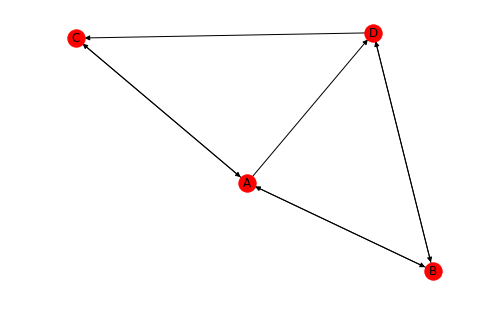

简化模型的PR值： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}
随机模型的PR值： {'A': 0.3214290507775999, 'B': 0.22619031640746662, 'C': 0.22619031640746662, 'D': 0.22619031640746662}


In [2]:
# 使用networkX计算节点的pagerank
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# 创建有向图
G = nx.DiGraph()   
# 设置有向图的边集合
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

# 有向图可视化
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True, hold=False)
plt.show()

# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)

# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.8)
print("随机模型的PR值：", pr)

# -----------------

In [1]:
import numpy as np
a = np.array([[0, 1/2, 1, 0], 
              [1/3, 0, 0, 1/2],
              [1/3, 0, 0, 1/2],
              [1/3, 1/2, 0, 0]])
a_leak = np.array([[0, 0, 0, 1/2], 
                   [0, 0, 0, 1/2],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0]])

a_sink = np.array([[0, 0, 0, 0], 
                   [1/2, 0, 0, 1],
                   [0, 1, 1, 0],
                   [1/2, 0, 0, 0]])

b = np.array([1/4, 1/4, 1/4, 1/4])
w = b

def work(a, w):
    for i in range(100):
        w = np.dot(a, w)
        print(w)

print('-'*30)

def random_work(a, w, n):
    d = 0.85
    for i in range(100):
        w = (1-d)/n + d*np.dot(a, w)
        print(w)

work(a, w)
#random_work(a, w, 4)
#random_work(a_leak, w, 4)
#random_work(a_sink, w, 4)

------------------------------
[0.375      0.20833333 0.20833333 0.20833333]
[0.3125     0.22916667 0.22916667 0.22916667]
[0.34375 0.21875 0.21875 0.21875]
[0.328125   0.22395833 0.22395833 0.22395833]
[0.3359375  0.22135417 0.22135417 0.22135417]
[0.33203125 0.22265625 0.22265625 0.22265625]
[0.33398438 0.22200521 0.22200521 0.22200521]
[0.33300781 0.22233073 0.22233073 0.22233073]
[0.33349609 0.22216797 0.22216797 0.22216797]
[0.33325195 0.22224935 0.22224935 0.22224935]
[0.33337402 0.22220866 0.22220866 0.22220866]
[0.33331299 0.222229   0.222229   0.222229  ]
[0.33334351 0.22221883 0.22221883 0.22221883]
[0.33332825 0.22222392 0.22222392 0.22222392]
[0.33333588 0.22222137 0.22222137 0.22222137]
[0.33333206 0.22222265 0.22222265 0.22222265]
[0.33333397 0.22222201 0.22222201 0.22222201]
[0.33333302 0.22222233 0.22222233 0.22222233]
[0.33333349 0.22222217 0.22222217 0.22222217]
[0.33333325 0.22222225 0.22222225 0.22222225]
[0.33333337 0.22222221 0.22222221 0.22222221]
[0.33333331 0.2

# -----------------

In [1]:
import numpy as np
a = np.array([[0, 12, 999, 999, 999, 16, 14], 
              [12, 0, 10,  999, 999, 7, 999],
              [999,10, 0,  3,   5,   6, 999],
              [999,999,3,  0,   4,  999,999],
              [999,999,5,  4,   0,   2, 8],
              [16, 7,  6, 999,  2,   0, 9],
              [14, 999,999,999, 8,   9, 0]])
n=7
# 使用Floyd算法
for k in range(0, n):
    for i in range(0, n):
        for j in range(0, n):
            if a[i][k] + a[k][j] < a[i][j]:
                a[i][j] = a[i][k] + a[k][j]

# 输出结果
print('各城市之间的最短距离：', a)
print('城市D到其他城市的最短距离：', a[3])

各城市之间的最短距离： [[ 0 12 22 22 18 16 14]
 [12  0 10 13  9  7 16]
 [22 10  0  3  5  6 13]
 [22 13  3  0  4  6 12]
 [18  9  5  4  0  2  8]
 [16  7  6  6  2  0  9]
 [14 16 13 12  8  9  0]]
城市D到其他城市的最短距离： [22 13  3  0  4  6 12]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.read_gml('./football.gml')
nx.draw(G,with_labels=True) 
#plt.show() 
print(nx.shortest_path(G, source='Buffalo', target='Kent'))
print(nx.shortest_path(G, source='Buffalo', target='Rice'))

# Dijkstra算法
print(nx.single_source_dijkstra_path(G, 'Buffalo'))
print(nx.multi_source_dijkstra_path(G, {'Buffalo', 'Rice'}))
# Flody算法
print(nx.floyd_warshall(G, weight='weight'))

# -----------------

In [3]:
#-*- encoding:utf-8 -*-
from textrank4zh import TextRank4Keyword, TextRank4Sentence

text = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。分析人士认为，此次行动并非土方突然之举，而是其在美国宣布从叙相关区域撤军后的必然选项。行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料。但可以确定的是，此举势必会给当地民众带来灾难，会给叙局势乃至地区局势带来严重影响。土国防部表示，作为“和平之泉”军事行动的一部分，土军队已开始在叙利亚北部幼发拉底河以东地区发动地面进攻。土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园。长期以来，土耳其都视叙库尔德武装为恐怖组织，欲将其清除。但美国却视这一武装为反恐作战合作伙伴，这让土耳其在采取行动时颇有顾忌。美土于8月曾同意在叙东北部建立一个“安全区”，隔离土边境和叙东北部的库尔德武装力量，但两国在“安全区”的范围和管理等方面迟迟无法达成一致。'

# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=2)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)

# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ading\AppData\Local\Temp\jieba.cache
Loading model cost 0.880 seconds.
Prefix dict has been built succesfully.


关键词：
土 0.042379195054714866
叙 0.039590539492346324
军事行动 0.02749413349232927
土耳其 0.023338347066152645
难民 0.02255149649387114
武装 0.02188669100703704
宣布 0.02155825665170464
美国 0.01893835927275734
人士 0.018865484735342414
安全区 0.018401768186738596
带来 0.0172058324374837
当日 0.01678404155184341
社交 0.016784041551843407
和平 0.016302507124455645
局势 0.016184022145912608
国防部 0.016132473667972203
能否 0.014758225625272913
走廊 0.01452798601585652
管理 0.014466391909541108
地面 0.01441900373174741
摘要：
5 0.13047221409423135 土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园
0 0.12176046334244907 土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动
2 0.12097306136967419 行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料


In [13]:
import numpy as np
import pandas as pd
from textrank4zh import TextRank4Keyword, TextRank4Sentence

In [15]:
nba_file = open("C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\nba_article_sample.txt", "r")
file_content = nba_file.read()
#print(nba_file.read())

# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=file_content, lower=True, window=2)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)

关键词：
库兹马 0.038064654148795216
卡莉 0.014711843685824797
弗林特 0.014429308976522453
只能 0.008708927849670523
训练 0.005108332485804119
没有 0.004965762566282697
球队 0.0049530690848341745
大学 0.004726693086432161
选秀 0.004051190056520512
教练 0.003993575354872934
想要 0.003868909525585959
令 0.003766388201231
赛季 0.003744109298863698
放弃 0.0036594461343285715
表现 0.003617467481211282
联盟 0.0032937339340464744
登陆 0.003166492977521681
生活 0.003132968900631031
等到 0.0031082752641219823
时 0.0030870289994546786


In [18]:
tr4s.analyze?

In [20]:
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=file_content, lower=True, source = 'no_stop_words')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=10):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

摘要：
21 0.013736351950550785 尽管卡莉没日没夜地打工挣钱，但日渐萧条的弗林特没有因此而用财富回报卡莉的劳动，卡莉还是失业了，她只能带着蹒跚学步的库兹马搬到祖父母家未完工的地下室，异常狼狈地连住了数月时间
43 0.013678781609977554 后来由于街区的篮球场时常会遭遇流氓地痞的骚扰，库兹马只能前往弗林特基督教青年会练球，出行成本的增加也意味着训练时间的缩短，库兹马每日都得跟时间赛跑，想方设法腾出时间以供训练
114 0.013192219418176826 库兹马从来没有忘记来时路的坎坷与弗林特的脏污
112 0.012980826112978756 ”库兹马叹息道，“我希望我能借由自身影响力为弗林特做些事情，我现在能力有限，我还没有赚到足够多的财富来帮助这座城市重建，我现在所能做到的就是呼吁外界关注弗林特的人祸，我想让弗林特焕发新生
18 0.012803821369449457 而在库兹马出生后，卡莉更是肩负着沉重的经济压力，她只能同时打着几份工养家糊口
61 0.01271798710183401 泪别卡莉后，库兹马孤身前往费城
45 0.012633021696324106 尽管生活困顿如旧，但是篮球仍令库兹马的胸腔满怀沸腾的热血，他每日都与朋友们结伴训练，练完后肆意躺倒在地放声高歌，年少何惧穷苦，只管随性而为
76 0.012547447496943191 克里斯科维亚克教练低估了从弗林特的炼狱中逃脱出来的库兹马，库兹马决不允许自己就此屈服，越挫越勇的他鼓足勇气敲响了教练办公室的大门
50 0.012523146720768454 那时候库兹马就读于本特利高中，他在高三赛季场均揽获17.9分14.4篮板3.8助攻3.4盖帽的全面数据，可却没有任何球探留意到地处穷乡僻壤的他，他从来都没有收到过精英训练营或AAU联赛的邀请
60 0.012315784512881803 窗外的月色裹挟着污水的脏臭，弗林特的永夜似乎还未到头，但卡莉与库兹马此刻都愿意相信，等到黑夜翻面之后会是崭新的白昼


# -----------------

In [21]:
# -*- coding: utf-8 -*-
import jieba
import jieba.analyse
import jieba.posseg as pseg

#sentence = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。分析人士认为，此次行动并非土方突然之举，而是其在美国宣布从叙相关区域撤军后的必然选项。行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料。但可以确定的是，此举势必会给当地民众带来灾难，会给叙局势乃至地区局势带来严重影响。土国防部表示，作为“和平之泉”军事行动的一部分，土军队已开始在叙利亚北部幼发拉底河以东地区发动地面进攻。土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园。长期以来，土耳其都视叙库尔德武装为恐怖组织，欲将其清除。但美国却视这一武装为反恐作战合作伙伴，这让土耳其在采取行动时颇有顾忌。美土于8月曾同意在叙东北部建立一个“安全区”，隔离土边境和叙东北部的库尔德武装力量，但两国在“安全区”的范围和管理等方面迟迟无法达成一致。'
sentence = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。'

# 获取分词
seg_list = jieba.cut(sentence, cut_all=False)
print(' '.join(seg_list))
# 获取分词和词性
words = pseg.cut(sentence)
for word, flag in words:
	print('%s, %s' % (word, flag))


# 通过TF-IDF获取关键词
keywords = jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
for item in keywords:
    print(item[0],item[1])
print('-'*100)

# 基于TextRank算法的关键词抽取
#keywords = jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v')) 
keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('n', 'ns')) 
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True) 
print(keywords)
for item in keywords:
    print(item[0],item[1])

土耳其 国防部 9 日晚 宣布 ， 土 军队 已 对 叙利亚 北部 的 库尔德 武装 展开 军事行动 。
土耳其, ns
国防部, nt
9, m
日晚, t
宣布, v
，, x
土, zg
军队, n
已, d
对, p
叙利亚, ns
北部, f
的, uj
库尔德, nrt
武装, n
展开, v
军事行动, n
。, x
军事行动 1.743778820336
叙利亚 1.6143464068739999
土耳其 1.485975629638
武装 1.410746902478
军队 1.140077878338
----------------------------------------------------------------------------------------------------
[('武装', 1.0), ('叙利亚', 0.9942864157411772), ('军事行动', 0.5129797474989228), ('军队', 0.5096188251976809)]
武装 1.0
叙利亚 0.9942864157411772
军事行动 0.5129797474989228
军队 0.5096188251976809
